## c006 - 01/03/2017 - MOYA - Chemistry outflow on the West Coast of Africa

Flight c006 was part of the MOYA (Methane Observations and Yearly Assessments) campaign. On this sortie a transect was investigated by flying stacked runs over the Ocean on the West Coast of Africa. The flight track (see further down) shows that the aircraft spent most of the time between 13 degree and 12 degree North at the 16 degree meridian.

In [1]:
%matplotlib inline

import cis
import datetime
import os

ROOT_DATA_PATH = '/Users/watson-parris/Desktop/cis_workshop/data/c006'

os.chdir(ROOT_DATA_PATH)

### Merging CAMS data files into a single NetCDF

The data merging has already been done. The below code is left only for reference in case anybody wants to do it themself.

iris can do the merge for us. The only pitfall is that iris refuses to concatenate datasets with differing history attributes. Therefore this attribute needs to be removed (popped) from every individual dataset before the concatenate function is called.

In [2]:
#import iris

## read all the data in
#cube_list = iris.load('z_cams_c_ecmf_20170301000000_prod_fc_pl*_aermr0*.nc')

## pop/remove the history attribute, otherwise merging is not possible
#for i in cube_list:
#    i.attributes.pop('history')

#ods = cube_list.concatenate()
## Use the compression option; this can reduce the size of your netCDF massively
#iris.save(ods, os.path.join(ROOT_DATA_PATH, 'moya_cams_c006.nc', zlib=True, packing='short'))

### Model data

The model data come from the Copernicus Atmospheric Monitoring Service (http://atmosphere.copernicus.eu/ftp-access-global-data). The available NetCDF covers the whole globe and at 25 pressure levels. The variables we use are the three different dust aerosols.

* aermr04	Dust Aerosol (0.03 - 0.55 um) Mixing Ratio
* aermr05	Dust Aerosol (0.55 - 0.9 um) Mixing Ratio
* aermr06	Dust Aerosol (0.9 - 20 um) Mixing Ratio

The current model products can be looked at online: http://atmosphere.copernicus.eu/catalogue#/

In [3]:
cams_c006 = cis.read_data_list('moya_cams_c006.nc',
                               ['aermr04', 'aermr05', 'aermr06'])
print(cams_c006)

GriddedDataList: 
0: Dust Aerosol (0.03 - 0.55 um) Mixing Ratio / (kg kg**-1) (time: 9; pressure_level: 25; latitude: 451; longitude: 900)
1: Dust Aerosol (0.55 - 0.9 um) Mixing Ratio / (kg kg**-1) (time: 9; pressure_level: 25; latitude: 451; longitude: 900)
2: Dust Aerosol (0.9 - 20 um) Mixing Ratio / (kg kg**-1) (time: 9; pressure_level: 25; latitude: 451; longitude: 900)


In [4]:
# Let's look at a curtain
cams_curtain = cams_c006.subset(x=[16.5, 17.5],
                                y=[11,14],
                                z=[300, 1000])

In [5]:
cams_curtain = cams_curtain.collapsed('time', how='mean')#
print(cams_curtain)

/Users/watson-parris/anaconda/envs/cis_env3/lib/python3.5/site-packages/iris/analysis/cartography.py:376: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


GriddedDataList: 
0: Dust Aerosol (0.03 - 0.55 um) Mixing Ratio / (kg kg**-1) (pressure_level: 11; latitude: 8; longitude: 2)
1: Dust Aerosol (0.55 - 0.9 um) Mixing Ratio / (kg kg**-1) (pressure_level: 11; latitude: 8; longitude: 2)
2: Dust Aerosol (0.9 - 20 um) Mixing Ratio / (kg kg**-1) (pressure_level: 11; latitude: 8; longitude: 2)


We like to see the relation of small to middle sized aerosol.

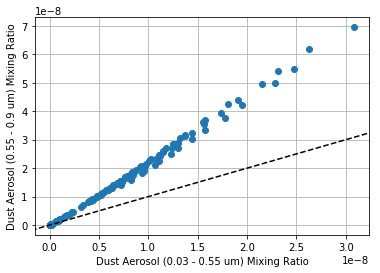

In [6]:
# create a new GriddedDataList
grid_list = cis.data_io.gridded_data.GriddedDataList()
grid_list.append(cams_curtain[0])
grid_list.append(cams_curtain[1])
ax = grid_list.plot(how='comparativescatter')
ax.grid()

In [7]:
cams_curtain = cams_curtain.collapsed('longitude', how='mean')

/Users/watson-parris/anaconda/envs/cis_env3/lib/python3.5/site-packages/iris/analysis/cartography.py:376: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


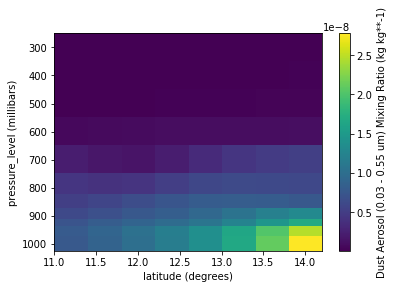

In [8]:
ax = cams_curtain[0].plot(yaxis='pressure_level', xaxis='latitude')
ax.invert_yaxis()

### Aircraft data

Read in the total scatter and back scatter data from the Nephelometer.

In [9]:
from cis.data_io.products.NCAR_NetCDF_RAF import NCAR_NetCDF_RAF, NCAR_NetCDF_RAF_variable_name_selector
from cis.data_io.ungridded_data import UngriddedDataList

# We have to do a bit of magic with the plugin so that it recognises 'PS_RVSM' as the pressure variable
#  We could also have added the relavent metadata to the file
selector = NCAR_NetCDF_RAF_variable_name_selector
selector.CORRECTED_PRESSURE_VAR_NAME = 'PS_RVSM'
plugin = NCAR_NetCDF_RAF(selector)

variables = ['TSC_BLUU', 'TSC_GRNU', 'TSC_REDU', 'BSC_BLUU', 'BSC_GRNU', 'BSC_REDU']

ara = UngriddedDataList(plugin.create_data_object(['core_faam_20170301_v004_r0_c006_1hz_edited.nc'], v) for v in variables)

In [10]:
print(ara)

UngriddedDataList: 
0: Ungridded data: Uncorrected blue total scattering coefficient from TSI 3563 Nephelometer / (m-1) 
1: Ungridded data: Uncorrected green total scattering coefficient from TSI 3563 Nephelometer / (m-1) 
2: Ungridded data: Uncorrected red total scattering coefficient from TSI 3563 Nephelometer / (m-1) 
3: Ungridded data: Uncorrected blue back scattering coefficient from TSI 3563 Nephelometer / (m-1) 
4: Ungridded data: Uncorrected green back scattering coefficient from TSI 3563 Nephelometer / (m-1) 
5: Ungridded data: Uncorrected red back scattering coefficient from TSI 3563 Nephelometer / (m-1) 
Coordinates: 
  time
  latitude
  longitude
  altitude
  air_pressure



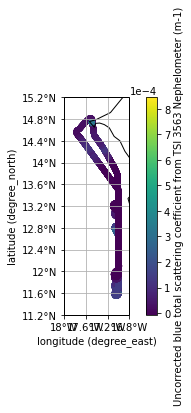

In [11]:
# TODO: Make the variables share one colorbar
ax = ara[0].plot()
ax.grid(True)

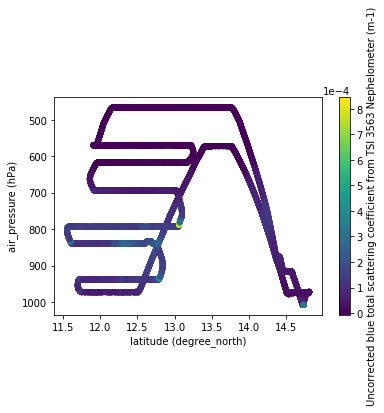

In [12]:
ax = ara[0].plot(xaxis='latitude', yaxis='air_pressure', how='scatter2d')

Add pressure as a new coordinate to the CIS aircraft dataset.

In [13]:
# Rename the CAMS pressure coordinate to match the aircraft
cams_c006[0].coord('pressure_level').rename('air_pressure')

In [14]:
col, = cams_c006[0].collocated_onto(ara[0])

/Users/watson-parris/anaconda/envs/cis_env3/lib/python3.5/site-packages/cis/collocation/gridded_interpolation.py:181: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  expanded_result[~self.missing_mask] = result


In [15]:
print(col)

Ungridded data: Dust Aerosol (0.03 - 0.55 um) Mixing Ratio / (kg kg**-1) 
     Shape = (17082,)

     Total number of points = 17082
     Number of non-masked points = 13058
     Long name = Dust Aerosol (0.03 - 0.55 um) Mixing Ratio
     Standard name = None
     Units = kg kg**-1
     Missing value = nan
     Range = (-11465.600086975088, 3.8159314719534299e-11)
     History = 2017-05-08T16:36:49Z Collocated onto sampling from: [] 
using CIS version 1.5.4 
variables: aermr04 
with files: ['moya_cams_c006.nc'] 
using collocator: <cis.collocation.col_implementations.GriddedUngriddedCollocator object at 0x10a852cf8> 
kernel: lin
     Coordinates: 
       time
          Long name = time of measurement
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Missing value = -1
          Range = (2017-03-01 15:35:15, 2017-03-01 20:19:56)
          History = 
          Misc attributes: 
            _Fillvalue = -1
            Calendar = gregorian
       lati

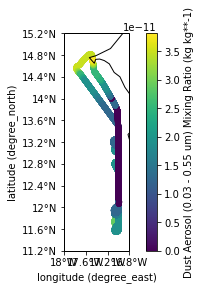

In [16]:
col.plot(vmin=0.0)

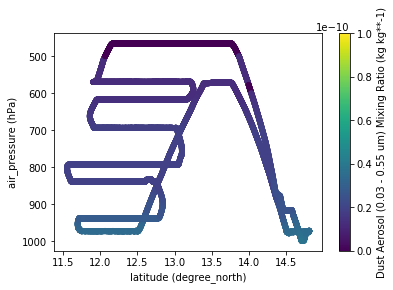

In [17]:
col.plot(xaxis='latitude', yaxis='air_pressure', how='scatter2d', vmin=0.0, vmax=1e-10)

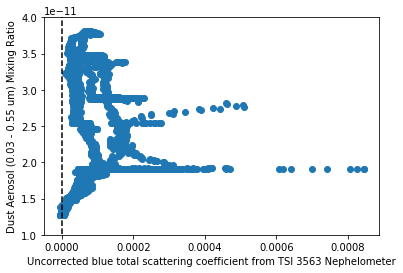

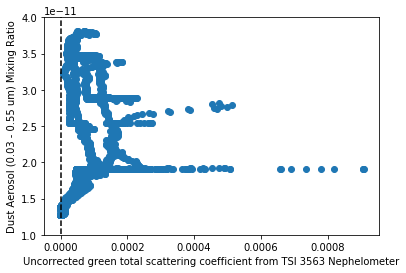

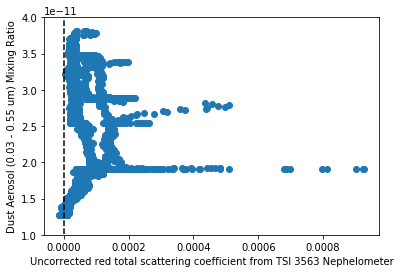

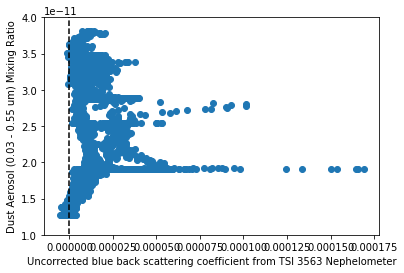

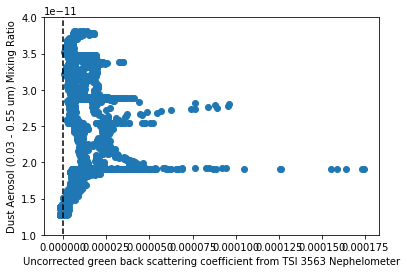

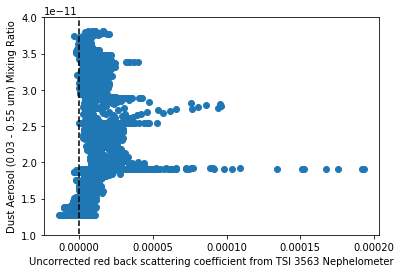

In [18]:
from cis.plotting.plot import basic_plot
for a in ara:
    _, ax = basic_plot(col, xaxis=a, how='comparativescatter')
    ax.set_ylim([1e-11, 4e-11])